# Uploading Data Set

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Reading in movies dataframe

In [3]:
df = pd.read_csv('/Users/bradbrauser/Desktop/Data Science/MoviesOnStreamingPlatforms_updated.csv')

In [4]:
print(df['IMDb'].isnull().sum())
print(df['Rotten Tomatoes'].isnull().sum())

571
11586


In [5]:
def wrangle(df, thresh=500):
    df = df.copy()
    
#     # Setting Title as index
#     df.set_index(df['Title'], inplace = True)
    
    # Since Rotten Tomatoes feature has over 11,000 missing ratings, I'm going to just drop the Rotten Tomatoes column
    df = df.drop(['Rotten Tomatoes'], axis = 1)
    
    # Dropping rows if nulls exist in IMDb column
    df.dropna(subset=['IMDb'], how='all')
    
    # Creating new target column
    df['Worth_Watching?'] = df['IMDb'] >= 6.0
    
    # Creating individual genre columns
    df['Action'] = df['Genres'].str.contains('Action')
    df['Adventure'] = df['Genres'].str.contains('Adventure')
    df['Animation'] = df['Genres'].str.contains('Animation')
    df['Biography'] = df['Genres'].str.contains('Biography')
    df['Comedy'] = df['Genres'].str.contains('Comedy')
    df['Crime'] = df['Genres'].str.contains('Crime')
    df['Documentary'] = df['Genres'].str.contains('Documentary')
    df['Drama'] = df['Genres'].str.contains('Drama')
    df['Family'] = df['Genres'].str.contains('Family')
    df['Fantasy'] = df['Genres'].str.contains('Fantasy')
    df['Film Noir'] = df['Genres'].str.contains('Film Noir')
    df['History'] = df['Genres'].str.contains('History')
    df['Horror'] = df['Genres'].str.contains('Horror')
    df['Music'] = df['Genres'].str.contains('Music')
    df['Musical'] = df['Genres'].str.contains('Musical')
    df['Mystery'] = df['Genres'].str.contains('Mystery')
    df['Romance'] = df['Genres'].str.contains('Romance')
    df['Sci-Fi'] = df['Genres'].str.contains('Sci-Fi')
    df['Short Film'] = df['Genres'].str.contains('Short Film')
    df['Sport'] = df['Genres'].str.contains('Sport')
    df['Superhero'] = df['Genres'].str.contains('Superhero')
    df['Thriller'] = df['Genres'].str.contains('Thriller')
    df['War'] = df['Genres'].str.contains('War')
    df['Western'] = df['Genres'].str.contains('Western')

    # Dropping unnecessary values
    df.drop(['Genres', 'Unnamed: 0', 'ID', 'Type', 'IMDb'], axis=1, inplace=True)
    
    # Dropping other nulls
    df = df.dropna()
    
    # Turning boolean values into binary
    df = df*1
    
    # Split label and feature matrix
    # Target
    y = df['Worth_Watching?']
    # Feature
    df.drop(['Worth_Watching?'], axis=1, inplace=True)
    
    return df, y

# Wrangling data into features and target
X, y = wrangle(df)

# Baseline - Evaluation metric: Accuracy
print(y.value_counts(normalize = True))

# Train test split on years movies were released
cutoff = 2010
X_train = X[X['Year'] < cutoff]
y_train = y.loc[X_train.index]
X_val = X[X['Year'] > cutoff]
y_val = y.loc[X_val.index]

1    0.513514
0    0.486486
Name: Worth_Watching?, dtype: float64


In [6]:
X.head()

,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Language,...,Musical,Mystery,Romance,Sci-Fi,Short Film,Sport,Superhero,Thriller,War,Western
0,Inception,2010,13+,1,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",...,0,0,0,1,0,0,0,1,0,0
1,The Matrix,1999,18+,1,0,0,0,"Lana Wachowski,Lilly Wachowski",United States,English,...,0,0,0,1,0,0,0,0,0,0
2,Avengers: Infinity War,2018,13+,1,0,0,0,"Anthony Russo,Joe Russo",United States,English,...,0,0,0,1,0,0,0,0,0,0
3,Back to the Future,1985,7+,1,0,0,0,Robert Zemeckis,United States,English,...,0,0,0,1,0,0,0,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,1,0,1,0,Sergio Leone,"Italy,Spain,West Germany",Italian,...,0,0,0,0,0,0,0,0,0,1


# Linear Model

In [7]:
# Logistic Model
log_model = Pipeline([
                ('oe', OrdinalEncoder()),
                ('imputer', SimpleImputer()),
                ('classifier', LogisticRegression(random_state = 42, max_iter = 100, 
                                                  verbose = 5, n_jobs = 4, ))        
])



log_model.fit(X_train, y_train);

print('Logistic Regression Model Training Accuracy:', log_model.score(X_train, y_train))
print('Logistic Regression Model Validation Accuracy:', log_model.score(X_val, y_val))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Logistic Regression Model Training Accuracy: 0.7663633695333137
Logistic Regression Model Validation Accuracy: 0.5189504373177842


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.7s finished


# Random Forest Model

In [8]:
from scipy.stats import randint, uniform

rf_model = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy = 'median'), 
    StandardScaler(), 
    RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=77, random_state=42, 
                           max_features = 0.5234288634835691))

param_distributions = {   
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

# Fitting the model
rf_model.fit(X_train, y_train)

print('Random Forest Model Training Accuracy:', rf_model.score(X_train, y_train))
print('Random Forest Model Validation Accuracy:', rf_model.score(X_val, y_val))
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  5.0min remaining:   33.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.3min finished


Random Forest Model Training Accuracy: 0.9703551511593778
Random Forest Model Validation Accuracy: 0.6965014577259475
Best hyperparameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.34528131996538536, 'randomforestclassifier__n_estimators': 380, 'simpleimputer__strategy': 'median'}
Cross-validation MAE -0.6968069429794627


# Visualizations

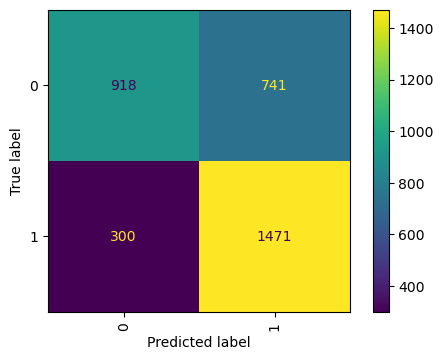

In [9]:
# Confusion Matrix - Random Forest
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(rf_model, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

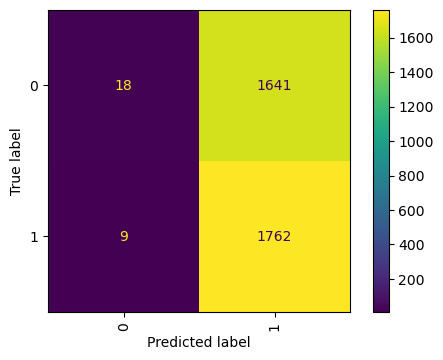

In [10]:
# Confusion Matrix - Logistic Regression
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(log_model, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

In [11]:
# Permutation Importances - Random Forest
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_val, y_val, 
                                n_repeats=5, random_state=42)

df = pd.DataFrame({'feature': X_val.columns,
                   'importances_mean': np.round(result['importances_mean'], 3),
                   'importances_std': result['importances_std']})

df.sort_values(by='importances_mean', ascending=False)

,feature,importances_mean,importances_std
17,Documentary,0.064,0.002123
10,Runtime,0.038,0.003976
18,Drama,0.021,0.004311
5,Prime Video,0.021,0.004768
23,Horror,0.014,0.001694
19,Family,0.006,0.001514
32,Thriller,0.006,0.003311
13,Animation,0.004,0.001256
11,Action,0.003,0.001716
9,Language,0.002,0.002233


In [12]:
# Permutation Importances - Logistic Regression
from sklearn.inspection import permutation_importance

result = permutation_importance(log_model, X_val, y_val, 
                                n_repeats=5, random_state=42)

df = pd.DataFrame({'feature': X_val.columns,
                   'importances_mean': np.round(result['importances_mean'], 3),
                   'importances_std': result['importances_std']})

df.sort_values(by='importances_mean', ascending=False)

,feature,importances_mean,importances_std
9,Language,0.001,0.000340
32,Thriller,0.001,0.000218
26,Mystery,0.000,0.000000
20,Fantasy,0.000,0.000117
21,Film Noir,0.000,0.000000
22,History,0.000,0.000000
23,Horror,0.000,0.000297
24,Music,0.000,0.000117
25,Musical,0.000,0.000000
0,Title,0.000,0.000000


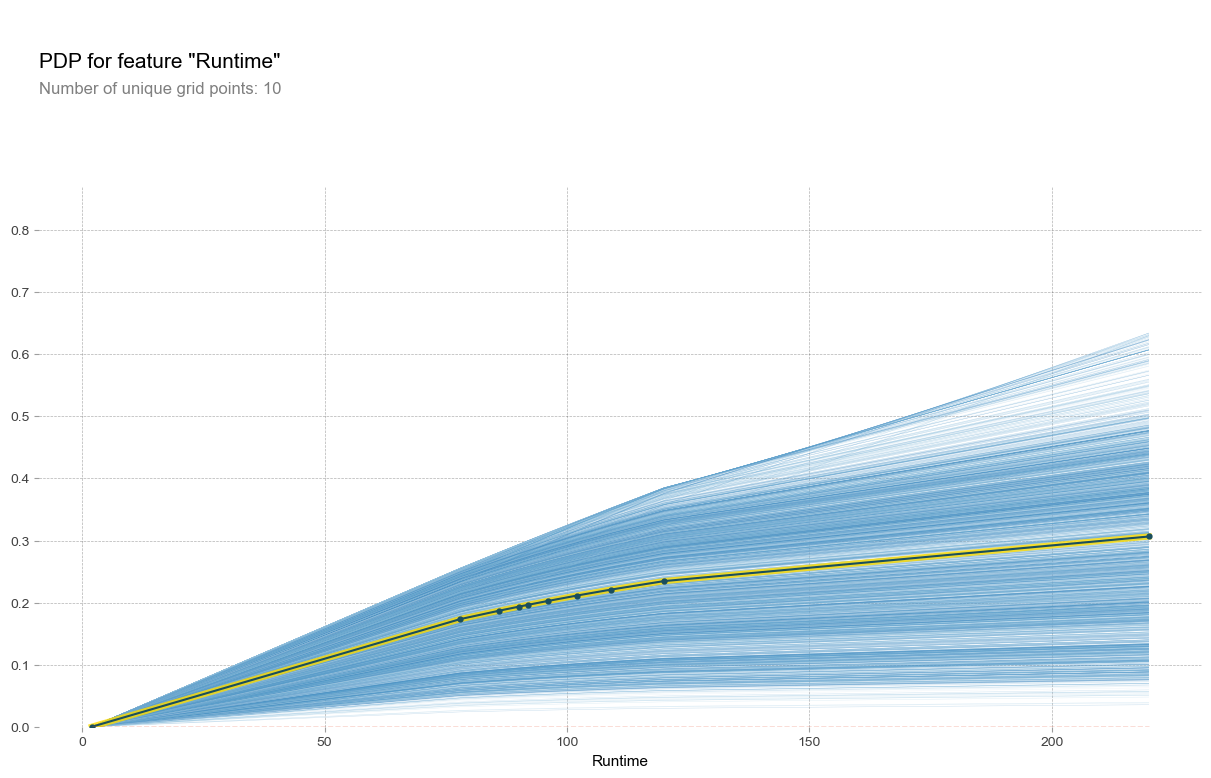

In [13]:
!pip install pdpbox
!pip install shap

from pdpbox.pdp import pdp_isolate, pdp_plot

# PDP Isolation - Logistic Regression
feature = 'Runtime'

isolated = pdp_isolate(
    model= log_model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True);

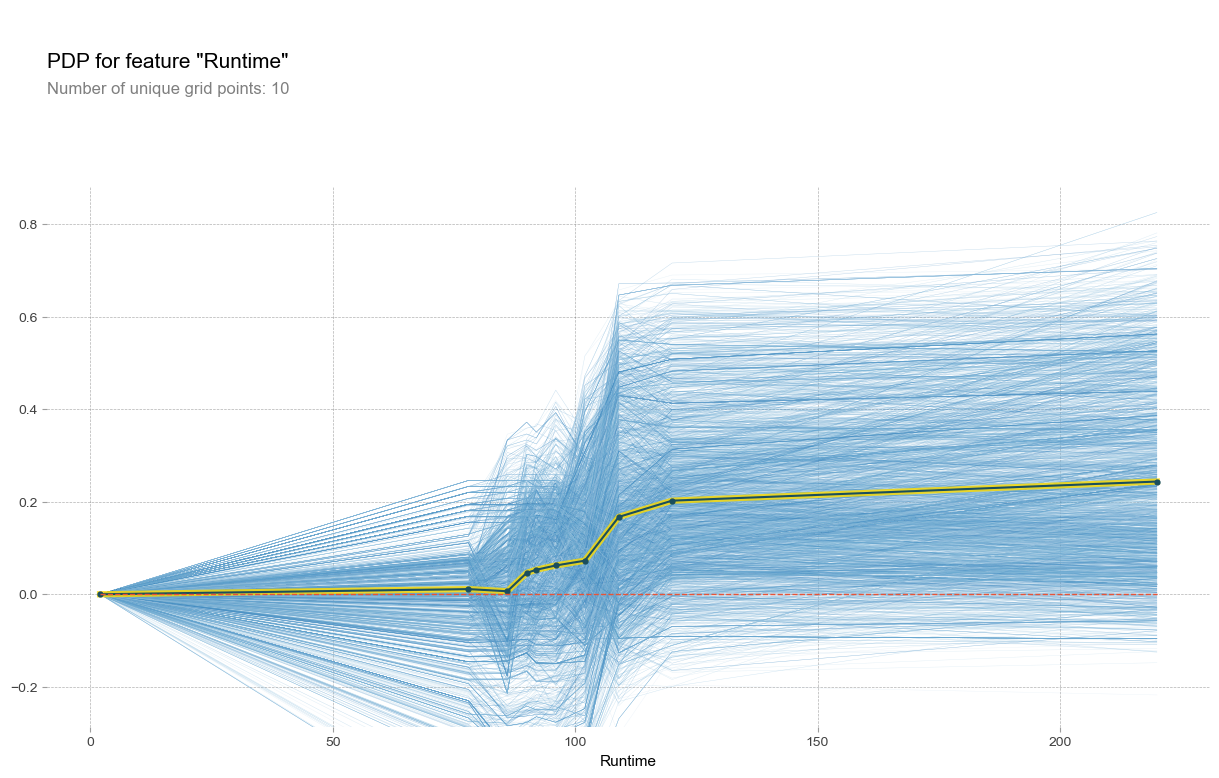

In [14]:
!pip install pdpbox
!pip install shap

from pdpbox.pdp import pdp_isolate, pdp_plot

# Isolated PDP - Random Forest
feature = 'Runtime'

isolated = pdp_isolate(
    model= rf_model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True);

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac8474b50>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac8b34810>})

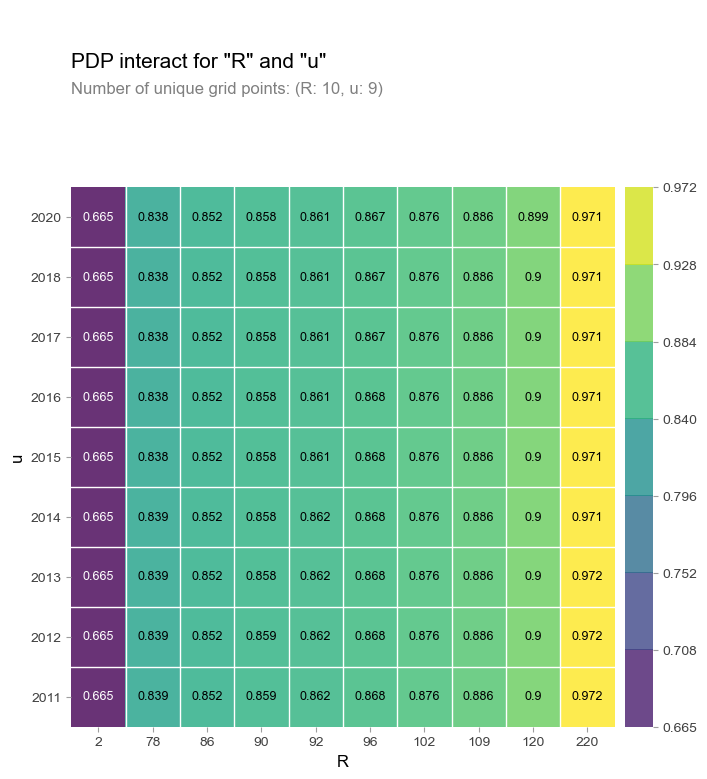

In [15]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# Interaction PDP - Logistic Regression
features = ['Runtime', 'Year']

interaction = pdp_interact(
    model=log_model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffac92be290>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ffacaad7250>})

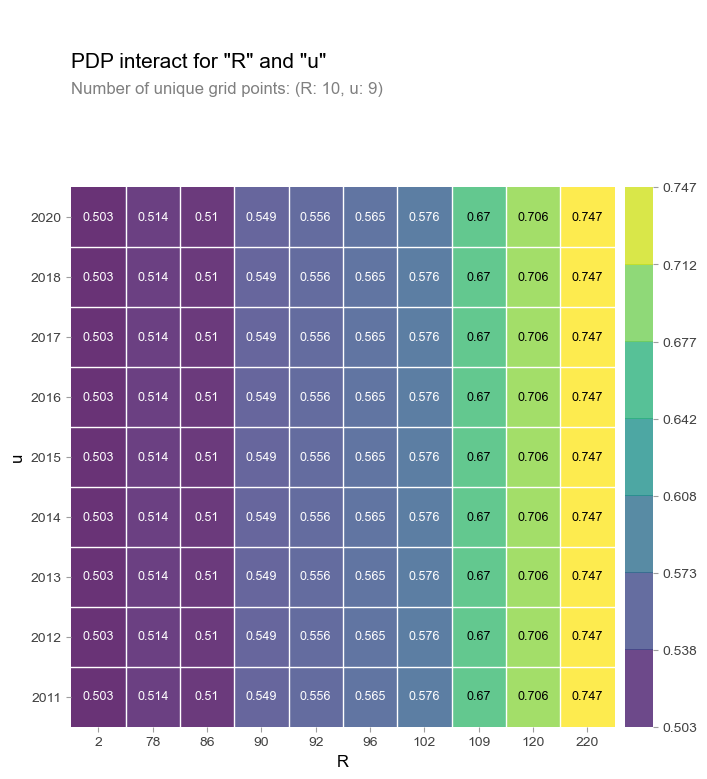

In [16]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Runtime', 'Year']

interaction = pdp_interact(
    model=rf_model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)

# Plotly Dash App

In [17]:
import joblib
import sklearn
import category_encoders as ce
import xgboost
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

joblib==0.16.0
scikit-learn==0.23.1
category_encoders==2.2.2
xgboost==1.1.1


In [18]:
# Pickling the pipeline
from joblib import dump
dump(rf_model, 'pipeline11.joblib', compress=True)

['pipeline1.joblib']

pipenv install joblib==0.16.0

pipenv install scikit-learn==0.23.1

pipenv install category_encoders==2.2.2

pipenv install xgboost==1.1.1